In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [18]:
categories = ['alt.atheism','comp.graphics','comp.os.ms-windows.misc'
             ,'comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','comp.windows.x'
             ,'misc.forsale','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey','sci.crypt'
             ,'sci.electronics','sci.space','soc.religion.christian','talk.politics.guns'
             ,'talk.religion.misc']
train = fetch_20newsgroups(subset='train',categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)
print(train.data[5])
#print(len(train.data))

From: d2cheng@undergrad.math.uwaterloo.ca (Dominic Cheng)
Subject: Re: Centris Cache & Bernoulli Box
Organization: University of Waterloo
Lines: 7

You will need Driver ver 3.5.2 to work with Quadra/Centris.  You can download
it from iomega BBS: 1-801-778-4400

--

Dominic Cheng (d2cheng@descartes.uwaterloo.ca)
Computer Science, University of Waterloo, Ontario, Canada



In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
labels = model.predict(test.data)

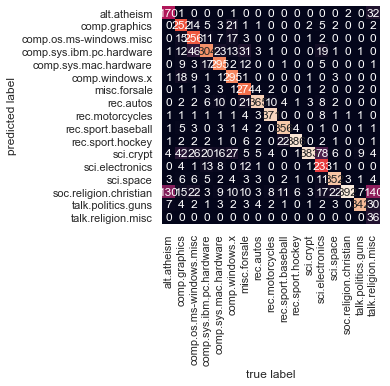

In [30]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True,annot=True, fmt='d', cbar=False
            , xticklabels=train.target_names
            ,yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [34]:
# predicting category on new data based on trained model
def predict_category(s,train=train, model=model):
    pred =model.predict([s])
    return train.target_names[pred[0]]

In [36]:
predict_category('jesus christ')

'soc.religion.christian'

In [37]:
predict_category('sending load to international space statation')

'sci.space'

In [38]:
predict_category('BMW is better than audi')

'rec.autos'

In [39]:
predict_category('president of India')

'sci.crypt'